# Phân tích dữ liệu điểm thi tốt nghiệp

Nhóm 4:
- 18120641 - Nguyễn Bách Tùng
- 18120651 - Phạm Hồng Vinh

## Dữ liệu

Dữ liệu được thu thập tại: https://www.kaggle.com/jonnyjackk/college-entrance-exam-scores-in-vietnam-2019

### Quá trình thu thập dữ liệu

Tác giả của dữ liệu đã sử dụng repository [bee-university](https://github.com/beecost/bee-university) để crawl dữ liệu từ trang tra cứu điểm thi của báo Tuổi Trẻ (hiện đã ngừng cung cấp dịch vụ tra cứu). Theo những hệ thống tra cứu này, những bài thí sinh không tham gia sẽ mang giá trị NaN

## Khám phá dữ liệu

In [1]:
!which python 

/d/miniconda3/envs/p4ds-env/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('diemthi2019_update.csv').drop(columns="Unnamed: 0")
df.head()

,SBD,Ngu Van,Toan Hoc,Ma Ngoai Ngu,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
0,24008611,8.00,8.2,N1,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,51000032,6.17,8.6,N1,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,51000005,4.75,5.2,NaN,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,51000021,4.50,4.4,NaN,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,51000013,6.00,5.8,N1,4.4,NaN,NaN,NaN,7.75,8.25,7.50


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột

Dữ liệu có 811,851 dòng và 11 cột. Mỗi dòng là một học sinh với điểm thi THPT tương ứng

In [4]:
print("Rows:", df.shape[0])
print("Cols:", df.shape[1])

Rows: 811851
Cols: 11


### Dữ liệu có các dòng bị lặp không?

Các dòng không có dữ liệu bị lặp dựa trên Số Báo Danh

In [5]:
id_duplicated = df[df.duplicated(['SBD'], keep=False)]
print("No. duplicate:", len(id_duplicated))
id_duplicated

No. duplicate: 0


,SBD,Ngu Van,Toan Hoc,Ma Ngoai Ngu,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD


### Mỗi cột có ý nghĩa gì?

Ta có 11 cột bao gồm:
* SBD: Số báo danh của học sinh trong kỳ thi
* Ngu Van: Điểm môn thi Ngữ Văn
* Toan Hoc: Điểm môn thi Toán Học
* Ma Ngoai Ngu: Mã đối với các môn thi Ngoại Ngữ trong đó:
    - N1: Tiếng Anh
    - N2: Tiếng Nga
    - N3: Tiếng Pháp
    - N4: Tiếng Trung
    - N5: Tiếng Đức
    - N6: Tiếng Nhật
* Ngoai Ngu: Điểm môn thi Ngoại Ngữ
* Vat Ly: Điểm môn thi Vật Lý
* Hoa Hoc: Điểm môn thi Hóa Học
* Sinh Hoc: Điểm môn thi Sinh Học
* Lich Su: Điểm môn thi Lịch Sử
* Dia Ly: Điểm môn thi Địa Lý
* GDCD: Điểm môn thi GDCD

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Các cột điểm thi đều có kiểu dữ liệu `float64`. Riêng cột `SBD` là `int64` và `Ma Ngoai Ngu` là `string`. Đây là các kiểu dữ liệu phù hợp để xử lý.

In [6]:
df.dtypes

SBD               int64
Ngu Van         float64
Toan Hoc        float64
Ma Ngoai Ngu     object
Ngoai Ngu       float64
Vat Ly          float64
Hoa Hoc         float64
Sinh Hoc        float64
Lich Su         float64
Dia Ly          float64
GDCD            float64
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [7]:
df = df.set_index("SBD")

#### Giá trị min/max của các cột

Ta có thể thấy, tất cả các cột số (các cột điểm thi môn học) đều có giá trị nhỏ nhất là 0 điểm và giá trị lớn nhất là 10 điểm (riêng môn Ngữ Văn không có điểm 10 mà chỉ đến 9.5). Vậy tức là dù ở môn nào, vẫn có học sinh bị điểm 0?

In [8]:
df.describe()

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
count,799208.000000,807762.000000,728513.000000,292166.000000,295544.000000,291199.000000,542729.000000,535897.000000,470905.000000
mean,5.442390,5.573748,4.240692,5.563926,5.342898,4.665719,4.293683,5.988069,7.353802
std,1.353822,1.758361,1.750507,1.619208,1.594621,1.247124,1.439408,1.232252,1.270562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.670000,4.200000,3.000000,4.500000,4.250000,3.750000,3.250000,5.250000,6.500000
50%,5.500000,5.600000,3.800000,5.750000,5.500000,4.500000,4.000000,6.000000,7.500000
75%,6.500000,7.000000,5.200000,6.750000,6.500000,5.250000,5.000000,6.750000,8.250000
max,9.500000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Với sự trợ giúp của boxplot, ta có thể được cái nhìn trực quan của các môn học:
- Môn GDCD có median cao nhất (7.5 điểm) và môn ngoại ngữ có median thấp nhất (3.8 điểm) 
- Với các ngưỡng trên, chỉ Toán, Lý, và GDCD không coi việc đạt điểm 10 là outlier, có thể nói đề của các môn này năm 2019 khá dễ. (Nhận xét từ các nguồn khác: [đề Toán](https://vnexpress.net/phan-dong-thi-sinh-de-tho-voi-de-toan-3943512.html), [đề Lý](https://laodong.vn/giao-duc/giao-vien-nhan-xet-de-thi-vat-li-thpt-quoc-gia-2019-nhu-the-nao-740950.ldo)
- Riêng các môn Sinh học và Lịch sử, học sinh chủ yếu tập trung quanh median, vậy nên các điểm trên 7.5 được coi là outlier. Việc này ngầm khẳng định đề của 2 môn này có phần khó hơn các môn còn lại

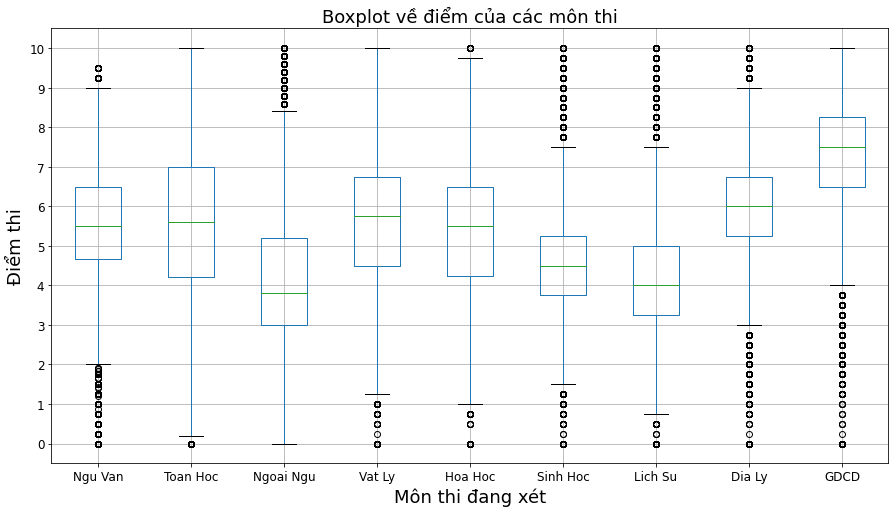

In [21]:
df.drop(columns="Ma Ngoai Ngu").boxplot(figsize=(15, 8), fontsize='large')
plt.yticks(range(11))
plt.xlabel("Môn thi đang xét", fontsize=18)
plt.ylabel("Điểm thi", fontsize=18)
plt.title("Boxplot về điểm của các môn thi", fontsize=18)
plt.show()

#### Tỷ lệ giá trị thiếu của các cột điểm thi và mã ngoại ngữ

Ta có thể thấy các môn có tỉ lệ các giá trị thiếu ít nhất là các môn bắt buộc Toán, Ngữ văn và Ngoại Ngữ.

Nhóm môn Xã Hội nhìn chung có tỉ lệ giá trị thiếu (30%-40%) ít hơn nhóm môn Tự Nhiên (~65%)

Điều này làm ta tự hỏi:
* Tại sao các môn Tự Nhiên lại có tỷ lệ thiếu cao như vậy
* Liệu một học sinh có thể không tham gia thi cả hai nhóm môn Xã Hội và Tự nhiên?
* Có bao nhiêu học sinh bỏ thi hoàn toàn? Hoặc chỉ thi 1 hoặc 2 môn

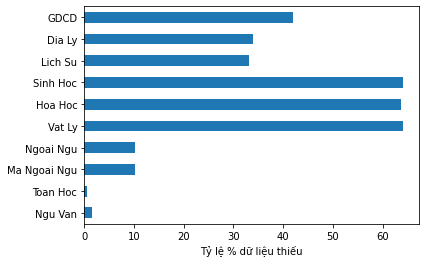

In [9]:
def missing_ratio(x):
    return round(x.isnull().sum()/len(x) * 100, 2)
df.agg(missing_ratio).plot.barh()
plt.xlabel("Tỷ lệ % dữ liệu thiếu")
plt.show()

#### Phân bố điểm thi của nhóm môn Khoa học Xã hội

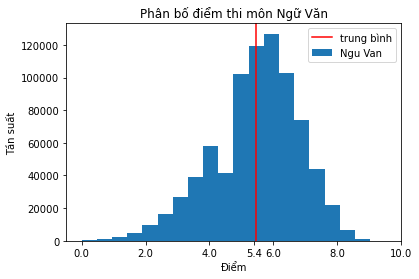

In [23]:
nv_series = df["Ngu Van"]
nv_series.plot.hist(bins=20)
plt.axvline(x=nv_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(nv_series.mean(),1)])
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn Ngữ Văn")
plt.show()

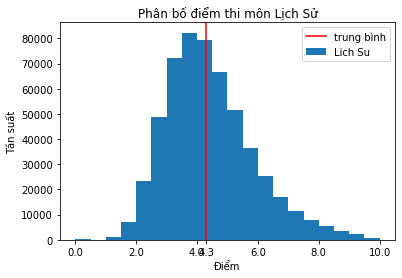

In [24]:
ls_series = df["Lich Su"]
ls_series.plot.hist(bins=20)
plt.axvline(x=ls_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(ls_series.mean(),1)])
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn Lịch Sử")
plt.show()

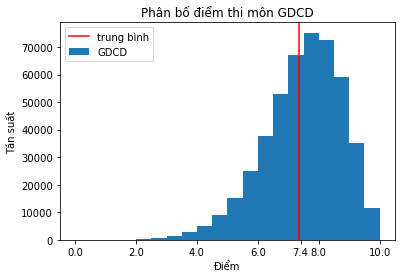

In [25]:
cd_series = df["GDCD"]
cd_series.plot.hist(bins=20)
plt.axvline(x=cd_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(cd_series.mean(),1)])
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn GDCD")
plt.show()

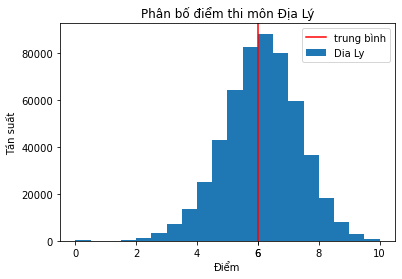

In [26]:
dl_series = df["Dia Ly"]
dl_series.plot.hist(bins=20)
plt.axvline(x=dl_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(dl_series.mean(),1)])
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn Địa Lý")
plt.show()

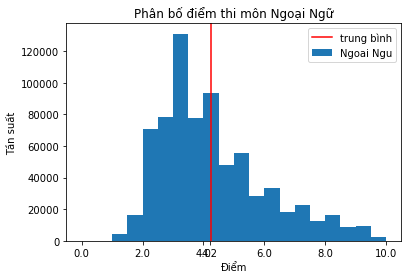

In [27]:
nn_series = df["Ngoai Ngu"]
nn_series.plot.hist(bins=20)
plt.axvline(x=nn_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(nn_series.mean(),1)])
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn Ngoại Ngữ")
plt.show()

##### Phân tích các Mã Ngoại ngữ và phân bố điểm thi cho từng Mã Ngoại ngữ

Đầu tiên, ta tìm hiểu các giá trị của Mã Ngoại ngữ và phần trăm xuất hiện. Như có thể thấy, tiếng Anh chiếm đến 89% trong tổng số thí sinh và các nhóm ngoại ngữ còn lại chiếm chưa đến 1%. Điều này cũng phù hợp với tìm kiếm của ta lúc trước khi có đến 10% thí sinh bỏ thi môn Ngoại Ngữ

In [34]:
nn_dict = {
    "N1": "Tiếng Anh",
    "N2": "Tiếng Nga",
    "N3": "Tiếng Pháp",
    "N4": "Tiếng Trung",
    "N5": "Tiếng Đức",
    "N6": "Tiếng Nhật",
}

df["Ma Ngoai Ngu"].value_counts().rename(nn_dict)/len(df["Ma Ngoai Ngu"]) * 100

Tiếng Anh      89.433160
Tiếng Trung     0.098663
Tiếng Nhật      0.095215
Tiếng Pháp      0.079571
Tiếng Nga       0.018230
Tiếng Đức       0.009977
Name: Ma Ngoai Ngu, dtype: float64

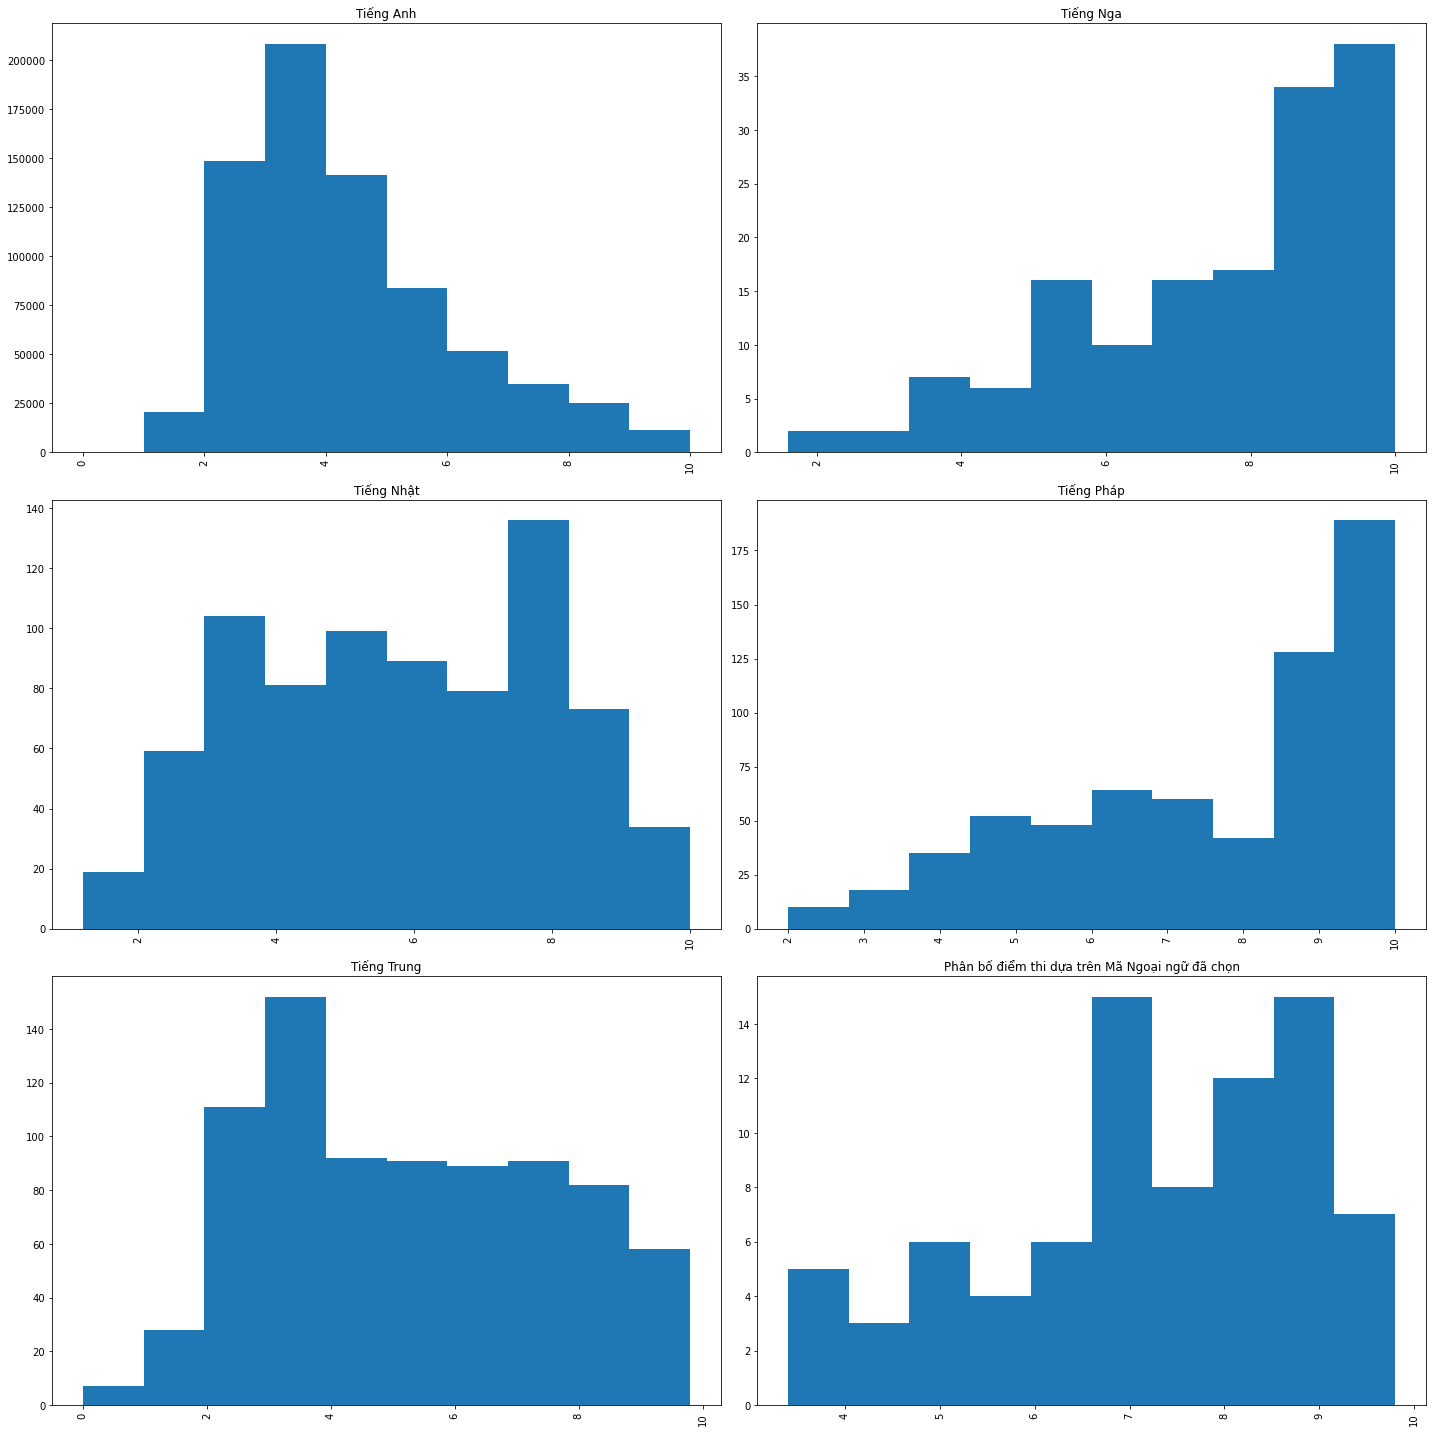

In [29]:
nn_df = pd.DataFrame(df[["Ngoai Ngu", "Ma Ngoai Ngu"]]).replace(nn_dict)

nn_df["Ngoai Ngu"].hist(by=nn_df["Ma Ngoai Ngu"], figsize=(20,20), bins=10)
plt.tight_layout()
plt.title("Phân bố điểm thi dựa trên Mã Ngoại ngữ đã chọn")
plt.show()

Khi biểu diễn tương quan giữa các khoa học xã hội, ta thấy:
- Nhóm môn Lịch Sử, Địa Lý và GDCD có sự tương quan mạnh với nhau, có vẻ như các học sinh học tổ hợp này ôn đều cho 3 môn

In [22]:
def _color_red_or_green(val):
    if val < 0.4:
        color = 'red'
    elif val < 0.5:
        color = 'orange'
    else:
        color = 'green'
    return 'background-color: %s' % color

khxh_col = ["Ngu Van","Ngoai Ngu","Lich Su", "Dia Ly", "GDCD"]
khxh_df = df[khxh_col]
khxh_df.corr().style.applymap(_color_red_or_green)

,Ngu Van,Ngoai Ngu,Lich Su,Dia Ly,GDCD
Ngu Van,1.000000,0.412665,0.445274,0.494857,0.456214
Ngoai Ngu,0.412665,1.000000,0.328869,0.344333,0.318517
Lich Su,0.445274,0.328869,1.000000,0.601641,0.500582
Dia Ly,0.494857,0.344333,0.601641,1.000000,0.583849
GDCD,0.456214,0.318517,0.500582,0.583849,1.000000


#### Phân tích điểm thi nhóm môn Khoa học Tự nhiên

In [36]:
point_df = pd.read_csv('diemthi2019_update.csv') 

In [37]:
num_cols_point = point_df.shape[1]
num_rows_point = point_df.shape[0]

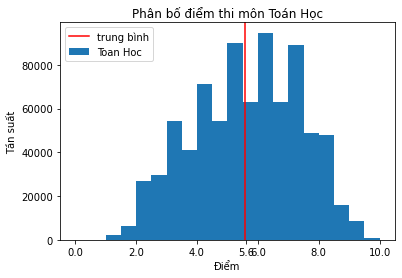

In [44]:
th_series = point_df["Toan Hoc"]
th_series.plot.hist(bins=20)
plt.axvline(x=th_series.mean(), color='r', label="trung bình")
plt.xticks(list(range(0, 11,2)) + [round(th_series.mean(),1)])
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn Toán Học")
plt.show()

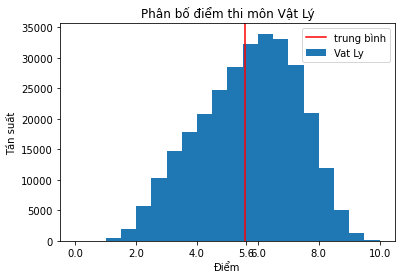

In [45]:
vl_series = point_df["Vat Ly"]
vl_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(vl_series.mean(),1)])
plt.axvline(x=vl_series.mean(), color='r', label="trung bình")
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn Vật Lý")
plt.show()

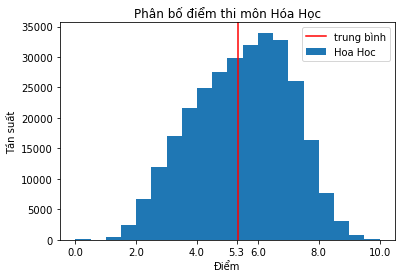

In [47]:
hh_series = point_df["Hoa Hoc"]
hh_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(hh_series.mean(),1)])
plt.axvline(x=hh_series.mean(), color='r', label="trung bình")
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn Hóa Học")
plt.show()

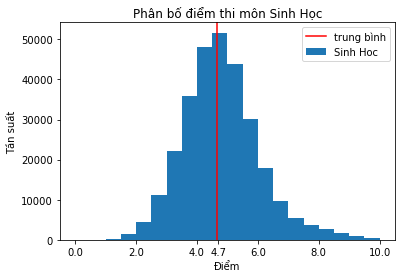

In [48]:
sh_series = point_df["Sinh Hoc"]
sh_series.plot.hist(bins=20)
plt.xticks(list(range(0, 11,2)) + [round(sh_series.mean(),1)])
plt.axvline(x=sh_series.mean(), color='r', label="trung bình")
plt.legend()
plt.ylabel("Tần suất")
plt.xlabel("Điểm")
plt.title("Phân bố điểm thi môn Sinh Học")
plt.show()

## Câu hỏi 1: phân loại học sinh theo giỏi toàn diện, lệch, trung bình, yếu 

lợi ích: cho thấy xu hướng chung thường thiên về một số môn hoặc theo hướng toàn diện.

Từ đó, điều chỉnh lại cách giảng dạy

In [24]:
point_df = point_df.set_index("SBD")
point_df["Toan Hoc"] = point_df["Toan Hoc"].replace(np.nan, 0)
point_df["Ngu Van"] = point_df["Ngu Van"].replace(np.nan, 0)
point_df["Ngoai Ngu"] = point_df["Ngoai Ngu"].replace(np.nan, 0)

In [25]:
score_df = point_df.drop(columns = ["Ma Ngoai Ngu", "Unnamed: 0"]).copy()

quy định rằng : 
- giỏi toàn diện: tổng điểm >= 7*số môn thi và điểm max và min cách biệt < 2
- lệch: tổng điểm >= số môn thi * 1 cách biệt giữa điểm max và min >= 2
- trung bình: tổng điểm >= 4*số môn thi và điểm max và min cách nhau nhỏ hơn 2 điểm
- yếu: còn lại

In [26]:
sum_score = score_df.sum(axis=1) + 0.05
chenh_lech = score_df.max(axis=1) - score_df.min(axis=1) 
so_mon_thi = score_df.notnull().sum(axis=1)
score_df.loc[(sum_score >= 4*so_mon_thi) & (chenh_lech < 2), "Phan loai"] = "Trung Binh"
score_df.loc[(sum_score >= 7*so_mon_thi) & (chenh_lech < 2), "Phan loai"] = "Gioi Toan Dien"
score_df.loc[(sum_score >= so_mon_thi) & (chenh_lech >= 2), "Phan loai"] = "Lech"
score_df.loc[score_df["Phan loai"].isnull(), "Phan loai"] = "Yeu"

In [27]:
score_df["Max diem"] = score_df.drop(columns = ["Phan loai"]).idxmax(axis = 1)
score_df["Min diem"] = score_df.drop(columns = ["Phan loai", "Max diem"]).idxmin(axis = 1)
score_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Phan loai,Max diem,Min diem
SBD,,,,,,,,,,,,
24008611,8.00,8.2,7.6,NaN,NaN,NaN,8.25,7.75,8.75,Gioi Toan Dien,GDCD,Ngoai Ngu
51000032,6.17,8.6,8.0,8.25,4.5,6.00,NaN,NaN,NaN,Lech,Toan Hoc,Hoa Hoc
51000005,4.75,5.2,0.0,NaN,NaN,NaN,4.00,4.25,5.75,Lech,GDCD,Ngoai Ngu
51000021,4.50,4.4,0.0,NaN,NaN,NaN,2.25,4.75,5.00,Lech,GDCD,Ngoai Ngu
51000013,6.00,5.8,4.4,NaN,NaN,NaN,7.75,8.25,7.50,Lech,Dia Ly,Ngoai Ngu
...,...,...,...,...,...,...,...,...,...,...,...,...
26019104,4.75,4.4,3.4,NaN,NaN,NaN,4.50,5.75,8.50,Lech,GDCD,Ngoai Ngu
26019102,6.25,5.2,4.4,3.75,4.5,4.00,NaN,NaN,NaN,Lech,Ngu Van,Vat Ly
26019099,5.00,2.8,2.8,NaN,NaN,NaN,5.50,5.50,8.00,Lech,GDCD,Toan Hoc


ta thấy tỉ lệ các học sinh học lệch là lớn nhất (khoảng 97%) còn học sinh Yeu, Trung binh và Gioi toan dien lần lượt là 4%, 2.2% và 0.34%. Như vậy, phần lớn các học sinh thường thiên về một số môn nhất định hơn là học dàn đều các môn

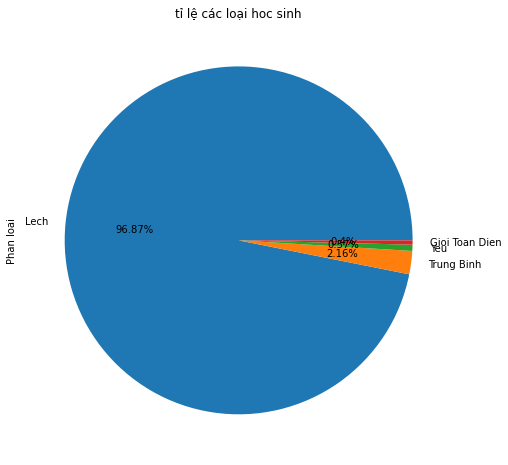

In [28]:
score_df["Phan loai"].value_counts().plot.pie(figsize=(8, 8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("tỉ lệ các loại hoc sinh")
plt.show()

In [29]:
score_df["Phan loai"].value_counts()

Lech              786454
Trung Binh         17504
Yeu                 4657
Gioi Toan Dien      3236
Name: Phan loai, dtype: int64

In [30]:
score_df.loc[score_df["Phan loai"] == "Lech", "Max diem"].value_counts()

GDCD         347197
Toan Hoc     177220
Dia Ly        94444
Ngu Van       75476
Ngoai Ngu     34234
Vat Ly        21292
Hoa Hoc       16266
Lich Su       13326
Sinh Hoc       6999
Name: Max diem, dtype: int64

In [31]:
score_df.loc[score_df["Phan loai"] == "Lech", "Min diem"].value_counts()

Ngoai Ngu    412016
Lich Su      131239
Sinh Hoc      69858
Ngu Van       51184
Toan Hoc      50498
Hoa Hoc       38589
Vat Ly        30103
Dia Ly         2769
GDCD            198
Name: Min diem, dtype: int64

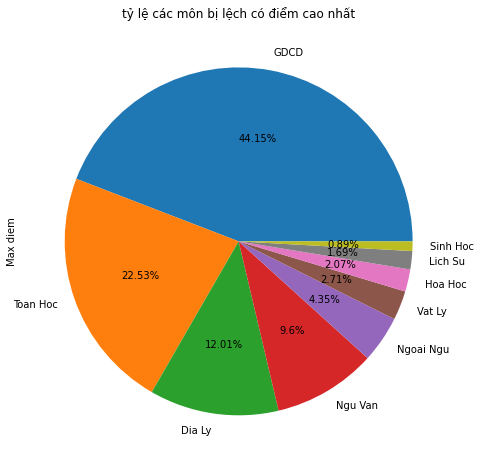

In [32]:
score_df.loc[score_df["Phan loai"] == "Lech", "Max diem"].value_counts().plot.pie(figsize=(8,8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("tỷ lệ các môn bị lệch có điểm cao nhất")
plt.show()

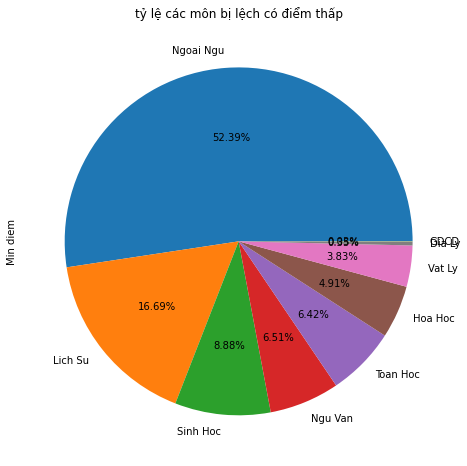

In [33]:
score_df.loc[score_df["Phan loai"] == "Lech", "Min diem"].value_counts().plot.pie(figsize=(8,8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("tỷ lệ các môn bị lệch có điểm thấp")
plt.show()

- Như ở trên, ta thấy các môn mà học sinh thường tập trung thì GDCD, Toán, Địa, Văn là những môn có nhiều điểm cao nhất, khác biệt rõ so với phần còn lai. Là do môn đó quá dễ hoặc là học sinh đã có chuẩn bị ?
- và trong số các môn có nhiều điểm thấp nhất là Ngoại ngữ, 1 trong 3 môn bắt buộc. Như vậy, có thể nói môn có độ khó cao hoặc là các thí sinh không tập trung chuẩn bị vào môn này.

## Câu hỏi 2: Tỷ lệ rớt tốt nghiệp năm 2019 dựa trên điểm liệt

Lợi ích: Phân tích nguyên nhân rớt tốt nghiệp từ đó củng cố các giảng dạy

Bộ giáo dục quy định một bài dưới 1 điểm cũng đồng nghĩa với việc học sinh đó đã rớt tốt nghiệp.

In [34]:
score_df = df.drop(columns="Ma Ngoai Ngu")
grad_df = score_df.copy()
grad_df["Tot Nghiep"] = ~(np.any((score_df <= 1.0) & (score_df != np.nan), axis=1) | np.any(score_df[["Toan Hoc", "Ngoai Ngu", "Ngu Van"]].isnull(), axis=1))
grad_df["So Mon Liet"] = np.sum(((score_df <= 1.0) & (score_df != np.nan)), axis=1) + np.sum(score_df[["Toan Hoc", "Ngoai Ngu", "Ngu Van"]].isnull(), axis=1)

In [35]:
grad_df[grad_df["Tot Nghiep"] == False]

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Tot Nghiep,So Mon Liet
SBD,,,,,,,,,,,
51000005,4.75,5.2,NaN,NaN,NaN,NaN,4.00,4.25,5.75,False,1
51000021,4.50,4.4,NaN,NaN,NaN,NaN,2.25,4.75,5.00,False,1
51000001,5.75,2.2,NaN,NaN,NaN,NaN,3.25,NaN,NaN,False,1
51000020,5.00,5.8,NaN,NaN,NaN,NaN,5.00,NaN,NaN,False,1
51000042,4.25,NaN,NaN,NaN,NaN,NaN,3.25,7.50,NaN,False,2
...,...,...,...,...,...,...,...,...,...,...,...
26018826,3.00,4.2,1.0,NaN,NaN,NaN,4.25,4.00,7.25,False,1
26018880,NaN,5.8,3.6,NaN,NaN,NaN,4.75,7.25,9.25,False,1
26018937,6.50,5.8,4.0,1.00,3.5,3.25,NaN,NaN,NaN,False,1


Ta có thể thấy tỉ lệ rớt tốt nghiệp do điểm liệt của năm 2019 là khoảng 11%. Trong đó, liệt do 1 môn chiếm 82% còn liệt do 2 môn chiếm 17%

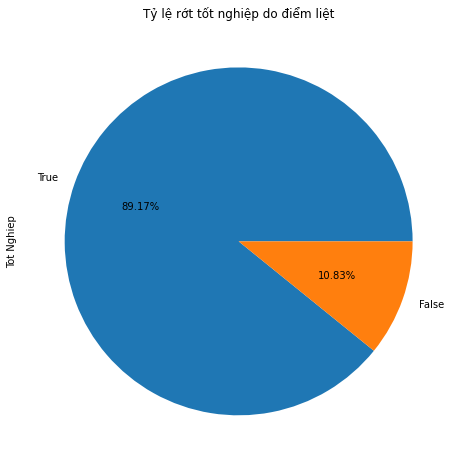

In [36]:
grad_df["Tot Nghiep"].value_counts().plot.pie(figsize=(8, 8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("Tỷ lệ rớt tốt nghiệp do điểm liệt")
plt.show()

Ta có thể xem chi tiết về số lượng các môn bị điểm liệt, có vẻ như số lượng học sinh bị một hoặc hai môn điểm liệt chiếm đa số. Ta hãy thử dùng pie chart để biểu diễn trực quan hơn tỷ lệ này

In [37]:
grad_df["So Mon Liet"].value_counts()

0    723951
1     72562
2     14872
3       257
5        99
6        62
4        46
8         2
Name: So Mon Liet, dtype: int64

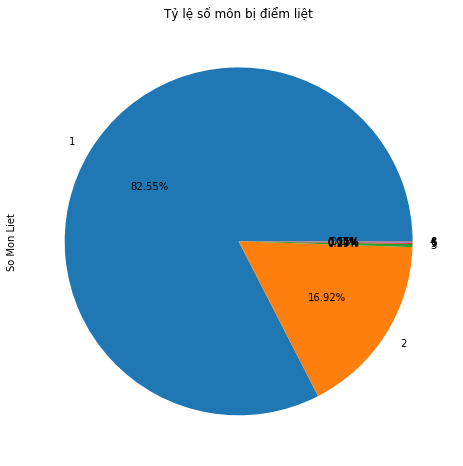

In [38]:
grad_df["So Mon Liet"].value_counts()[1:].plot.pie(figsize=(8,8), autopct=lambda x: str(round(x, 2)) + "%")
plt.title("Tỷ lệ số môn bị điểm liệt")
plt.show()

Có riêng 2 trường hợp là liệt 8 môn, khi xem xét thử, có vẻ như đây là 2 trường hợp bỏ thi

In [39]:
grad_df[grad_df["So Mon Liet"] == 8]

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Tot Nghiep,So Mon Liet
SBD,,,,,,,,,,,
63001230,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,False,8
63001320,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,False,8


## Phân tích năng lực học sinh rớt tốt nghiệp

Do Toán, Văn, Ngoại Ngữ là 3 môn bắt buộc khi thi tốt nghiệp THPT. Đạt điểm liệt trong những môn này phần nào loại bỏ tính ngẫu nhiên trong trong kết quả và phản ánh năng lực của học sinh và của đề bài. Nếu học sinh đạt điểm liệt ở một trong 3 môn nhưng lại đạt trên trung bình các môn khác, có thể nói môn đó có độ khó cao. Ngược lại, ta có thể nói học sinh đó chưa chuẩn bị tốt

### Điểm liệt do môn Toán

In [40]:
math_fail_df = score_df[score_df["Toan Hoc"] <= 1.0]
math_fail_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
SBD,,,,,,,,,
28029946,2.50,0.8,NaN,NaN,NaN,NaN,3.75,2.75,NaN
28030104,3.00,1.0,NaN,NaN,NaN,NaN,3.75,5.25,NaN
28030378,3.50,0.8,NaN,NaN,NaN,NaN,3.00,3.75,NaN
6002426,5.00,1.0,1.2,NaN,NaN,NaN,3.25,5.50,5.50
6002481,3.25,1.0,2.6,NaN,NaN,NaN,1.75,3.25,4.75
...,...,...,...,...,...,...,...,...,...
29003775,3.25,1.0,2.8,NaN,NaN,NaN,3.50,3.50,4.50
29003930,4.50,1.0,2.6,NaN,NaN,NaN,3.50,3.75,5.50
29004008,6.00,1.0,2.0,NaN,NaN,NaN,2.25,5.00,5.75


Dựa vào phân bố môn Ngữ Văn và Ngoại Ngữ của các học sinh bị điểm liệt môn Toán, có phân phối của các môn còn lại đều thấp hơn so với trung bình tổng thể. Điều tương tự cũng có thể quan sát được với những học sinh có điểm liệt môn Văn

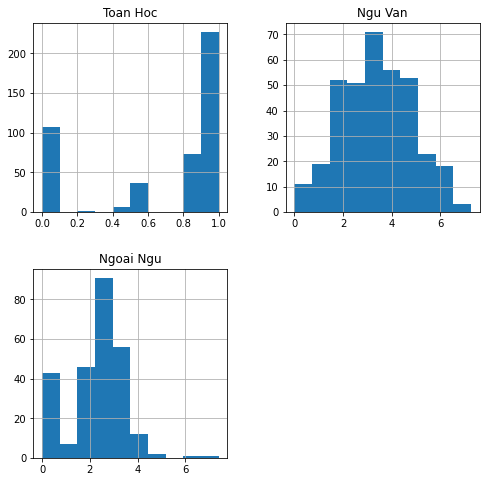

In [41]:
math_fail_df[["Toan Hoc", "Ngu Van", "Ngoai Ngu"]].hist(figsize=(8,8))
plt.show()

### Điểm liệt do môn Văn

Một điều đáng lưu ý là số lượng học sinh bị điểm liệt do môn Văn là khá nhiều

In [42]:
literature_fail_df = score_df[score_df["Ngu Van"] <= 1.0]
literature_fail_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
SBD,,,,,,,,,
51000649,1.00,NaN,NaN,NaN,NaN,NaN,3.50,6.25,NaN
28029710,0.00,2.6,1.8,NaN,NaN,NaN,1.75,3.50,5.5
6000140,0.50,3.4,NaN,NaN,NaN,NaN,3.75,5.50,NaN
6000141,0.50,2.4,NaN,NaN,NaN,NaN,2.75,3.00,NaN
6000138,0.75,2.2,NaN,NaN,NaN,NaN,2.25,4.00,NaN
...,...,...,...,...,...,...,...,...,...
26016571,0.25,2.0,NaN,NaN,NaN,NaN,1.75,2.25,NaN
26016627,1.00,2.6,NaN,NaN,NaN,NaN,3.25,2.50,NaN
26016643,1.00,3.0,NaN,NaN,NaN,NaN,2.50,3.50,NaN


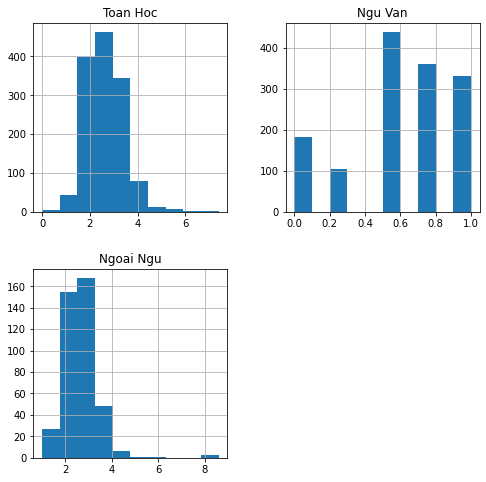

In [43]:
literature_fail_df[["Toan Hoc", "Ngu Van", "Ngoai Ngu"]].hist(figsize=(8,8))
plt.show()

Riêng môn Ngoại Ngữ, ta thấy có một chút khác biệt về phân phối. Chúng trải đều hơn. Có thể do học sinh không chú trọng môn học này lắm.

### Điểm liệt do môn Ngoại Ngữ

In [44]:
lang_fail_df = score_df[score_df["Ngoai Ngu"] <= 1.0]
lang_fail_df

,Ngu Van,Toan Hoc,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
SBD,,,,,,,,,
28026400,2.25,3.4,1.0,NaN,NaN,NaN,4.50,3.50,5.50
28027314,6.50,2.6,0.6,NaN,NaN,NaN,4.00,5.50,7.25
28027657,5.00,4.8,0.8,NaN,NaN,NaN,3.25,5.25,4.50
28027843,6.25,4.6,1.0,NaN,NaN,NaN,6.25,6.25,9.25
28029338,6.25,5.2,1.0,NaN,NaN,NaN,3.75,5.75,7.25
...,...,...,...,...,...,...,...,...,...
29003707,6.50,5.0,1.0,NaN,NaN,NaN,3.75,5.75,6.25
29003834,3.50,2.8,1.0,NaN,NaN,NaN,2.75,3.25,3.25
29004540,4.75,3.4,1.0,NaN,NaN,NaN,2.25,5.75,4.50


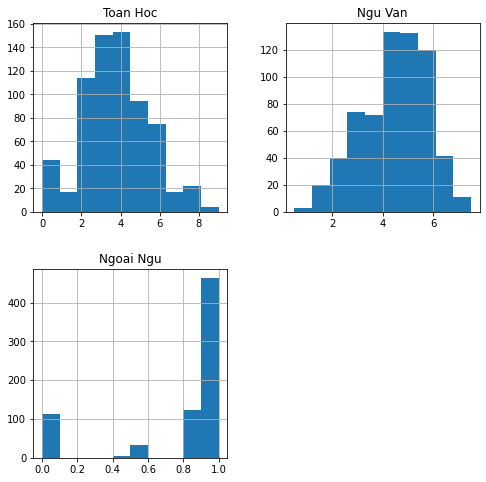

In [45]:
lang_fail_df[["Toan Hoc", "Ngu Van", "Ngoai Ngu"]].hist(figsize=(8,8))
plt.show()